In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 36, 3)
        self.linear1 = nn.Linear(36 * 6 * 6, 180)
        self.linear2 = nn.Linear(180, 60)
        self.linear3 = nn.Linear(60, 20)
        self.linear4 = nn.Linear(20, 5)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 36, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=1296, out_features=180, bias=True)
  (linear2): Linear(in_features=180, out_features=60, bias=True)
  (linear3): Linear(in_features=60, out_features=20, bias=True)
  (linear4): Linear(in_features=20, out_features=5, bias=True)
)


In [3]:
params = list(net.parameters())

In [4]:
len(params)

12

params[even_number] is the weights of the layer. params[uneven_number] is the bias of the nodes

In [5]:
print(list(net.named_parameters())[1])

('conv1.bias', Parameter containing:
tensor([-0.2295, -0.2892,  0.2096, -0.0476, -0.1930, -0.1476],
       requires_grad=True))


In [6]:
input = torch.randn(10, 1, 32, 32)  

In [7]:
input

tensor([[[[ 0.9484,  1.2714,  0.3038,  ...,  0.6057, -0.9730,  0.8446],
          [ 0.3191,  0.2286,  1.0890,  ..., -1.2288, -0.0701, -0.0845],
          [-1.3617,  0.0197,  0.6869,  ...,  0.5134,  2.3805,  0.5640],
          ...,
          [ 0.0270, -1.6710,  0.4972,  ...,  0.6012, -0.4015, -0.0582],
          [ 0.4504,  1.6333,  0.7317,  ...,  0.8712,  0.1827, -1.3928],
          [-0.4876,  0.1918, -1.6700,  ..., -0.6025, -0.2191, -1.3643]]],


        [[[-0.3080,  0.3503, -0.0447,  ..., -0.4871,  0.7297, -0.7390],
          [ 1.0393,  0.8408,  0.5737,  ...,  1.8424,  0.9422, -0.7513],
          [-0.0992,  1.0427, -0.3004,  ..., -0.7407,  1.6079, -1.0683],
          ...,
          [-0.2116, -0.4448,  0.6381,  ..., -1.3397, -0.3431,  0.3153],
          [-0.4395, -1.2858,  1.1747,  ...,  0.9426,  0.9584, -0.0771],
          [-1.4260, -0.2151, -1.2433,  ...,  1.7756, -0.0788,  0.2043]]],


        [[[-0.3911, -0.3967,  0.1795,  ..., -0.9704, -0.8160, -0.1187],
          [ 0.8474, -0.512

In [8]:
out = net(input)

In [9]:
out

tensor([[-0.1040,  0.0591,  0.2196,  0.0882,  0.1894],
        [-0.1116,  0.0685,  0.2290,  0.0738,  0.1919],
        [-0.1099,  0.0604,  0.2152,  0.0805,  0.1872],
        [-0.1043,  0.0705,  0.2138,  0.0909,  0.2002],
        [-0.1014,  0.0644,  0.2252,  0.0791,  0.1959],
        [-0.1056,  0.0627,  0.2186,  0.0832,  0.1917],
        [-0.1042,  0.0541,  0.2133,  0.0912,  0.1964],
        [-0.1145,  0.0630,  0.2317,  0.0787,  0.1951],
        [-0.1103,  0.0618,  0.2275,  0.0677,  0.1871],
        [-0.1265,  0.0650,  0.2301,  0.0748,  0.1912]],
       grad_fn=<AddmmBackward>)

Zero the gradient buffers of all parameters and backprops with random
gradients:


In [10]:
net.zero_grad()
out.backward(torch.randn(10, 5))

Loss function

In [11]:
output = net(input)
target = torch.randn(10, 5)  # a dummy target, for example
target = target.view(10, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0821, grad_fn=<MseLossBackward>)


In [12]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# Backpropagation

In [13]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
print('linear4.bias.grad before backward')
print(net.linear4.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
linear4.bias.grad before backward
tensor([0., 0., 0., 0., 0.])


In [14]:
loss.backward(retain_graph=True)

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)
print('linear4.bias.grad after backward')
print(net.linear4.bias.grad)

conv1.bias.grad after backward
tensor([ 0.0011,  0.0004, -0.0008, -0.0006,  0.0005,  0.0015])
linear4.bias.grad after backward
tensor([-0.0761,  0.0947, -0.0743,  0.1861,  0.0237])


In [15]:
net.zero_grad()  
# The gradient is cumulative. So this reseting it to zero is very important for recurrent nns. 

# Train on CIFAR10

## Redefine nn

In [88]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 36, 3)
        self.linear1 = nn.Linear(36 * 6 * 6, 180)
        self.linear2 = nn.Linear(180, 60)
        self.linear3 = nn.Linear(60, 20)
        self.linear4 = nn.Linear(20, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 36, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=1296, out_features=180, bias=True)
  (linear2): Linear(in_features=180, out_features=60, bias=True)
  (linear3): Linear(in_features=60, out_features=20, bias=True)
  (linear4): Linear(in_features=20, out_features=10, bias=True)
)


In [89]:
params = list(net.parameters())

In [90]:
import torchvision
import torchvision.transforms as transforms

In [91]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [92]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

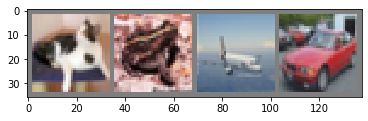

  cat  frog plane   car


In [93]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define loss function and optimizer

In [94]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [95]:
for epoch in range(5):
    running_loss = 0.0  # Reset the loss
    
    for i, data in enumerate(trainloader):  # Training set
        inputs, labels = data
        
        # Reset gradient here, since they are additive
        optimizer.zero_grad()
        
        # Run the net
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
         # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
        

[1,  2000] loss: 2.271
[1,  4000] loss: 2.003
[1,  6000] loss: 1.830
[1,  8000] loss: 1.666
[1, 10000] loss: 1.580
[1, 12000] loss: 1.493
[2,  2000] loss: 1.354
[2,  4000] loss: 1.331
[2,  6000] loss: 1.289
[2,  8000] loss: 1.232
[2, 10000] loss: 1.238
[2, 12000] loss: 1.210
[3,  2000] loss: 1.107
[3,  4000] loss: 1.076
[3,  6000] loss: 1.101
[3,  8000] loss: 1.064
[3, 10000] loss: 1.077
[3, 12000] loss: 1.047
[4,  2000] loss: 0.941
[4,  4000] loss: 0.938
[4,  6000] loss: 0.944
[4,  8000] loss: 0.942
[4, 10000] loss: 0.945
[4, 12000] loss: 0.947
[5,  2000] loss: 0.796
[5,  4000] loss: 0.835
[5,  6000] loss: 0.835
[5,  8000] loss: 0.848
[5, 10000] loss: 0.844
[5, 12000] loss: 0.856
Finished Training


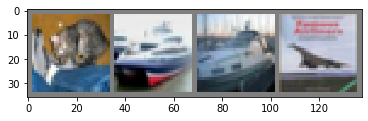

GroundTruth:    cat  ship  ship plane


In [96]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [97]:
outputs = net(images)

In [98]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [99]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 65 %


In [100]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 82 %
Accuracy of  bird : 56 %
Accuracy of   cat : 45 %
Accuracy of  deer : 65 %
Accuracy of   dog : 48 %
Accuracy of  frog : 76 %
Accuracy of horse : 69 %
Accuracy of  ship : 84 %
Accuracy of truck : 58 %
